In [1]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from   natsort import natsorted

In [2]:

# Function to get all image paths

def get_image_paths(directory):
    file_types = {
        'img1.nii.gz': [],
        'img2.nii.gz': [],
        'seg1.nii.gz': [],
        'seg2.nii.gz': [],
        'flow.nii.gz': [],
        'w_img.nii.gz': [],
        'w_seg.nii.gz': [],
        'jdet.nii.gz': [],
        'flow_mm.nii.gz': [],
        'jdet_mm.nii.gz': [],
        'flow_4d.nii.gz': []
    }

    for filename in os.listdir(directory):
        for file_suffix in file_types:
            if filename.endswith(file_suffix):
                file_types[file_suffix].append(os.path.join(directory, filename))
                break  # Break the loop once a match is found

    for key in file_types:
        file_types[key] = natsorted(file_types[key])

    return file_types

In [3]:
def load_nifti_image(filepath):
    img  = sitk.ReadImage(filepath)
    data = sitk.GetArrayFromImage(img)
    data = np.moveaxis(data, [0, 1, 2], [2, 1, 0])
    return img, data

In [4]:
# Function to visualize a 3D image with consistent color scale
def visualize_images(image_data, cmap='gray'):
    # Plot slices from the 3D data
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Select slices (middle slice in each dimension)
    slice_sagittal = np.transpose(image_data[image_data.shape[0] // 2, :, :], (1, 0))
    slice_coronal = np.transpose(image_data[:, image_data.shape[1] // 2, :], (1, 0))
    slice_axial = np.transpose(image_data[:, :, image_data.shape[2] // 2], (1, 0))

    slices = [slice_sagittal, slice_coronal, slice_axial]
    titles = ['Sagittal Slice', 'Coronal Slice', 'Axial Slice']

    for i, ax in enumerate(axes):
        im = ax.imshow(slices[i], cmap=cmap, origin='lower')
        ax.set_title(titles[i])
        fig.colorbar(im, ax=ax)

    plt.show()

#### Visualizing Fixed and Moving Images

In [5]:
directory    = '/data/groups/beets-tan/l.estacio/Med_Align_Net/ants_Abd/'
image_paths  = get_image_paths(directory)
img1_paths   = image_paths['img1.nii.gz']
img2_paths   = image_paths['img2.nii.gz']
img1_0_path  = img1_paths[0]
img2_0_path  = img2_paths[0]

FIXED IMAGE


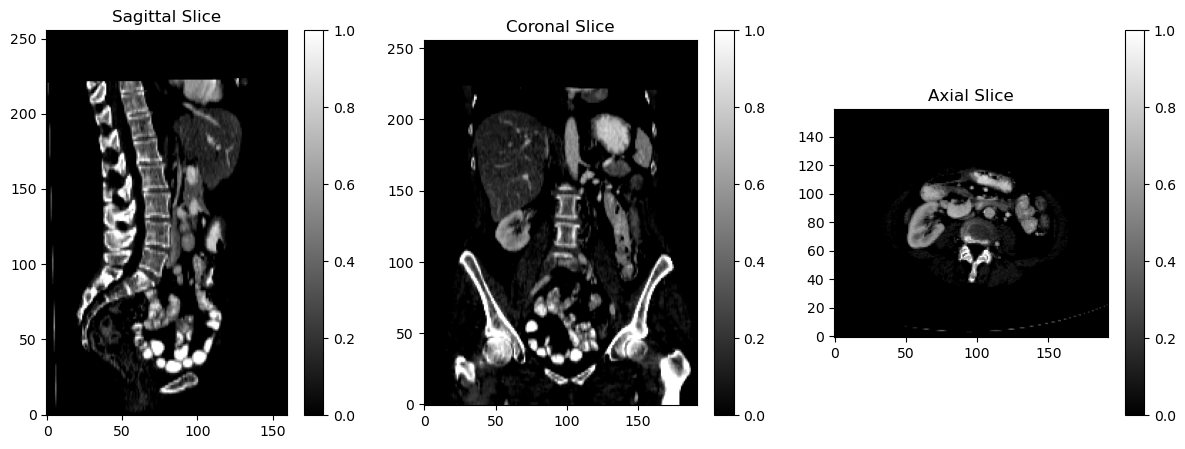

In [6]:
print('FIXED IMAGE')
color_range = (0, 2)
img, img_data = load_nifti_image(img1_0_path)
visualize_images(img_data)

MOVING IMAGE


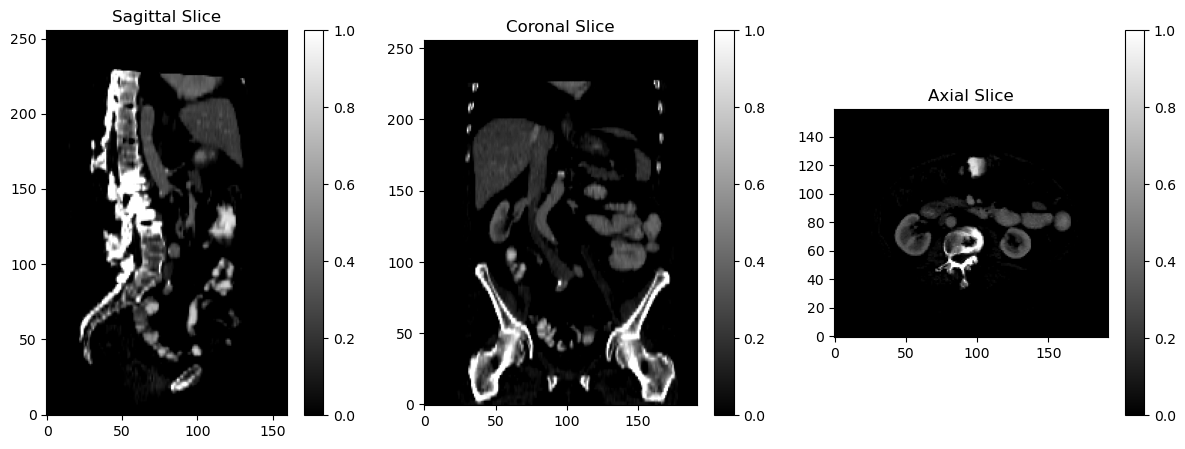

In [7]:
print('MOVING IMAGE')
color_range = (0, 2)
img, img_data = load_nifti_image(img2_0_path)
visualize_images(img_data)